In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

NameError: name 'load_data' is not defined

In [5]:
y.shape, tx.shape

NameError: name 'y' is not defined

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx.dot(w)
    
    mse = np.mean(e**2)/2

    return mse


In [5]:
w = np.array([[1],[2]])
MSE = compute_loss(y, tx, w)

In [6]:
MSE

2721.4427907570757

# 2. Grid Search

Fill in the function `grid_search()` below:

In [47]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    
    # print(losses)
    wi = 0
    for w0 in grid_w0:
        wj = 0
        for w1 in grid_w1:
            
            w = np.array([w0, w1])
            mse = compute_loss(y, tx, w)
            losses[wi, wj] = mse
            # print(mse)
            wj += 1
            # print(wj)
        wi += 1
        # print(wi)
    # print(losses)
    
    
        
    # raise NotImplementedError
    return losses

In [48]:
grid_w0 = np.arange(-100, 200, 50)
grid_w1 = np.arange(-150, 150, 50)
print(grid_w0)
print(grid_w1)
losses = grid_search(y, tx, grid_w0, grid_w1)

[-100  -50    0   50  100  150]
[-150 -100  -50    0   50  100]


In [49]:
losses

array([[28393.58577822, 21469.60015647, 17045.61453472, 15121.62891297,
        15697.64329122, 18773.65766947],
       [20978.88967811, 14054.90405636,  9630.91843461,  7706.93281286,
         8282.94719111, 11358.96156937],
       [16064.19357801,  9140.20795626,  4716.22233451,  2792.23671276,
         3368.25109101,  6444.26546926],
       [13649.4974779 ,  6725.51185615,  2301.5262344 ,   377.54061265,
          953.5549909 ,  4029.56936916],
       [13734.8013778 ,  6810.81575605,  2386.8301343 ,   462.84451255,
         1038.8588908 ,  4114.87326905],
       [16320.10527769,  9396.11965594,  4972.13403419,  3048.14841244,
         3624.16279069,  6700.17716894]])

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=46.084 seconds


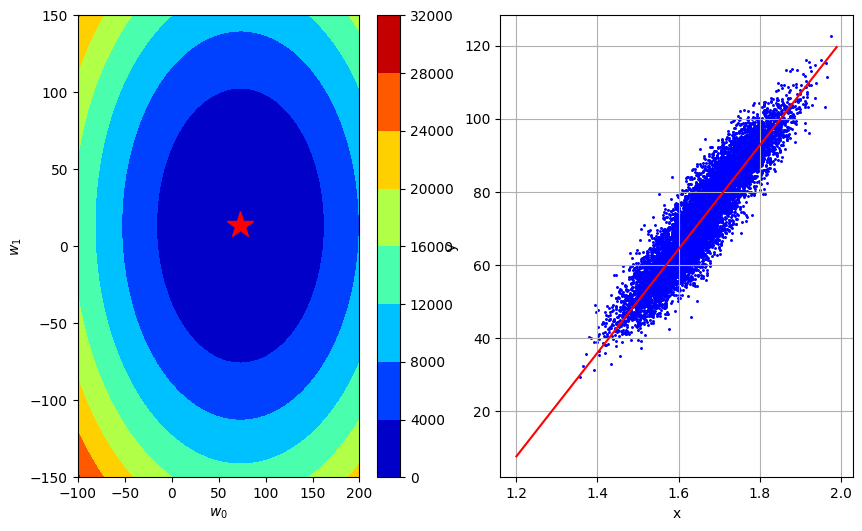

In [50]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [51]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    e = y - (tx.dot(w))
    gradient = - (tx.T).dot(e)/y.shape[0]
    return gradient

In [52]:
wi = np.array([100,
              20])
wit = wi.T
wii = np.array([50,
                10])
wiit = wii.T
print(compute_gradient(y,tx,wit))
print(compute_gradient(y,tx,wiit))


[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [54]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [55]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492282
GD iter. 1/49: loss=265.30246210896007, w0=66.69746902191572, w1=12.266538315840002
GD iter. 2/49: loss=37.87837955044118, w0=71.31498610804834, w1=13.11576019924433
GD iter. 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412117, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305070998, w1=13.479705271317192
G

In [56]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [57]:
from helpers import batch_iter
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    e = y - tx.dot(w)

    return -tx.T.dot(e)
    


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            # print(batch_iter(y,tx,batch_size))
            stochastic_grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            w = w - gamma * stochastic_grad
            loss= compute_loss(y,tx,w)
            ws.append(w)
            losses.append(loss)

            print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [58]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 3

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

(10000,)
SGD iter. 0/49: loss=1675.2874085320318, w0=19.529924227097027, w1=-7.238289026911769
(10000,)
SGD iter. 1/49: loss=522.606213642901, w0=41.581759023529216, w1=16.442712733399148
(10000,)
SGD iter. 2/49: loss=274.8963688582443, w0=52.65335971553607, w1=3.836676062917711
(10000,)
SGD iter. 3/49: loss=90.59643521733169, w0=61.63728026536978, w1=9.666079243608053
(10000,)
SGD iter. 4/49: loss=66.75102716813186, w0=63.691848588849446, w1=10.234644675287848
(10000,)
SGD iter. 5/49: loss=43.56772229660562, w0=65.8535035067991, w1=14.481631329041605
(10000,)
SGD iter. 6/49: loss=25.626202154710313, w0=68.82665104153416, w1=12.75575198261568
(10000,)
SGD iter. 7/49: loss=23.134750388067285, w0=70.48252292395377, w1=10.724034612411613
(10000,)
SGD iter. 8/49: loss=19.574994143284123, w0=71.40913875428438, w1=11.28294101819496
(10000,)
SGD iter. 9/49: loss=16.03846151943205, w0=72.15576900926291, w1=13.380944696888667
(10000,)
SGD iter. 10/49: loss=16.578930770714422, w0=72.388180860603

In [59]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [79]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=False, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [80]:
y.shape, tx.shape

((10002,), (10002, 2))

In [81]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2793.0633249190396, w0=51.31194997183169, w1=9.375829281932603
GD iter. 1/49: loss=266.5853963287443, w0=66.70553496338118, w1=12.188578066512388
GD iter. 2/49: loss=39.202382755617975, w0=71.32361046084604, w1=13.032402701886328
GD iter. 3/49: loss=18.737911534036567, w0=72.70903311008549, w1=13.28555009249851
GD iter. 4/49: loss=16.896109124094252, w0=73.12465990485732, w1=13.361494309682165
GD iter. 5/49: loss=16.73034690719944, w0=73.24934794328888, w1=13.384277574837261
GD iter. 6/49: loss=16.715428307678906, w0=73.28675435481834, w1=13.39111255438379
GD iter. 7/49: loss=16.714085633722057, w0=73.29797627827718, w1=13.393163048247748
GD iter. 8/49: loss=16.713964793065944, w0=73.30134285531483, w1=13.393778196406936
GD iter. 9/49: loss=16.713953917406897, w0=73.30235282842612, w1=13.393962740854693
GD iter. 10/49: loss=16.71395293859758, w0=73.30265582035952, w1=13.39401810418902
GD iter. 11/49: loss=16.71395285050474, w0=73.30274671793954, w1=13.39403471318931

In [71]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [82]:
import math
def compute_mae(y, tx, w):
    e = y - tx.dot(w)

    mae = np.mean(np.abs(e))
    return mae


# def sign_e(e):
#     if e > 0:
#         sign = 1
        
#     else if e = 0:
#         sign = 0
    
#     else:
#         sign = -1
#     return sign

def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    e = y - tx.dot(w)
    subgradient = - tx.T.dot(np.sign(e))/y.shape[0]
    
    return subgradient
    
    
    
    


In [83]:
# help(np.sign)

In [84]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        subgrad = compute_subgradient_mae(y, tx, w)
        loss = compute_mae(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma * subgrad

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [87]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.30278567404525, w0=0.7, w1=-1.2332555381718993e-16
SubGD iter. 1/499: loss=72.60278567404525, w0=1.4, w1=-2.4665110763437986e-16
SubGD iter. 2/499: loss=71.90278567404525, w0=2.0999999999999996, w1=-3.699766614515698e-16
SubGD iter. 3/499: loss=71.20278567404526, w0=2.8, w1=-4.933022152687597e-16
SubGD iter. 4/499: loss=70.50278567404526, w0=3.5, w1=-6.166277690859497e-16
SubGD iter. 5/499: loss=69.80278567404525, w0=4.2, w1=-7.399533229031396e-16
SubGD iter. 6/499: loss=69.10278567404525, w0=4.9, w1=-8.632788767203295e-16
SubGD iter. 7/499: loss=68.40278567404525, w0=5.6000000000000005, w1=-9.866044305375195e-16
SubGD iter. 8/499: loss=67.70278567404526, w0=6.300000000000001, w1=-1.1099299843547093e-15
SubGD iter. 9/499: loss=67.00278567404526, w0=7.000000000000001, w1=-1.2332555381718991e-15
SubGD iter. 10/499: loss=66.30278567404525, w0=7.700000000000001, w1=-1.356581091989089e-15
SubGD iter. 11/499: loss=65.60278567404525, w0=8.4, w1=-1.4799066458062788e-

In [86]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [88]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************


        stochastic_subgrad = compute_subgradient_mae(y, tx, w)
        w = w - gamma * stochastic_subgrad
        loss= compute_loss(y,tx,w)
        ws.append(w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [89]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=2741.9963749472076, w0=0.7, w1=-1.2332555381718993e-16
SubSGD iter. 1/499: loss=2691.4194249753755, w0=1.4, w1=-2.4665110763437986e-16
SubSGD iter. 2/499: loss=2641.3324750035445, w0=2.0999999999999996, w1=-3.699766614515698e-16
SubSGD iter. 3/499: loss=2591.7355250317128, w0=2.8, w1=-4.933022152687597e-16
SubSGD iter. 4/499: loss=2542.6285750598813, w0=3.5, w1=-6.166277690859497e-16
SubSGD iter. 5/499: loss=2494.0116250880487, w0=4.2, w1=-7.399533229031396e-16
SubSGD iter. 6/499: loss=2445.8846751162173, w0=4.9, w1=-8.632788767203295e-16
SubSGD iter. 7/499: loss=2398.2477251443856, w0=5.6000000000000005, w1=-9.866044305375195e-16
SubSGD iter. 8/499: loss=2351.100775172554, w0=6.300000000000001, w1=-1.1099299843547093e-15
SubSGD iter. 9/499: loss=2304.4438252007226, w0=7.000000000000001, w1=-1.2332555381718991e-15
SubSGD iter. 10/499: loss=2258.2768752288907, w0=7.700000000000001, w1=-1.356581091989089e-15
SubSGD iter. 11/499: loss=2212.5999252570587, w0=8.4, w

In [90]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>